In [171]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json

In [172]:
parameter={
    'query':'명동',
    'display':'100',
    'start':'1',
    'sort':'date'
}

In [173]:
myheader={
    'X-Naver-Client-Id':'7XEjEKMkrgly40G6nVDv',
    'X-Naver-Client-Secret':'O1iJEa4pz8'
}

In [174]:
data=requests.get(url, params=parameter, headers=myheader).json()

In [175]:
result=[]
start=1
end_point='https://openapi.naver.com/v1/search/blog.json?start='
url=end_point+str(start)
data=requests.get(url, params=parameter, headers=myheader).json()
while start<=1000 :
    result=result+data['items']
    start=start+int(parameter['display'])
    #print(start)
    data=requests.get(url, params=parameter, headers=myheader).json()

In [176]:
df=pd.DataFrame(result)

In [177]:
result=''
for i in range(1000) :
    result=result+df['title'][i]

In [178]:
result=' '.join(df['description'])

In [179]:
import matplotlib.pyplot as plt

In [180]:
from wordcloud import WordCloud

In [181]:
result=result.replace('b','')

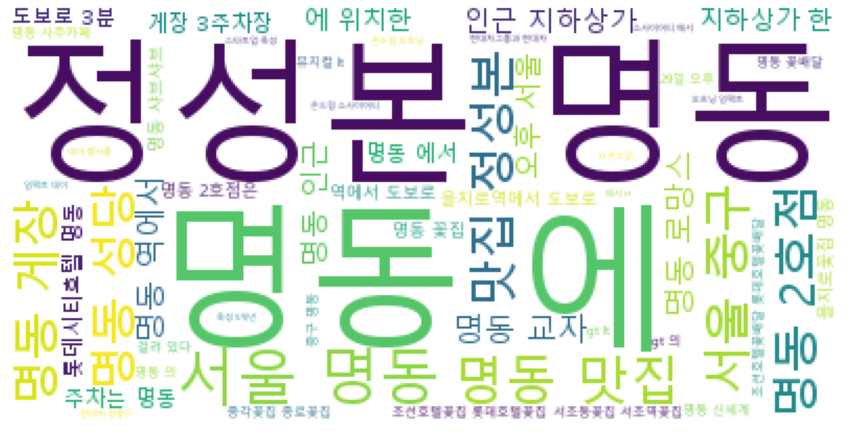

In [182]:
wc= WordCloud(font_path='c:/windows/fonts/malgun.ttf',
             background_color='white').generate(result)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()